In [ ]:
# Основным методом для создания простейших графиков в Pandas является plot()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [ ]:
# Основные параметры метода plot()
# x — название признака, который будет отложен по оси абсцисс;
# y — название признака, который будет отложен по оси ординат;
# figsize — размер графика (кортеж из ширины и высоты в дюймах);
# kind —тип визуализации. Основные типы:
# 'line' — линейный график (по умолчанию);
# 'bar' — столбчатая диаграмма;
# 'barh' — горизонтальная столбчатая диаграмма;
# 'hist' — гистограмма;
# 'box' — коробчатая диаграмма (boxplot);
# 'pie' — круговая диаграмма;
# 'scatter' — диаграмма рассеяния.
# grid — отображение сетки (по умолчанию False);
# legend — отображение легенды (по умолчанию False);
# title — название графика;
# color — цвет.

In [2]:
import pandas as pd
covid_df = pd.read_csv('data/covid_df.csv')
display(covid_df.head(3))

,Unnamed: 0,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


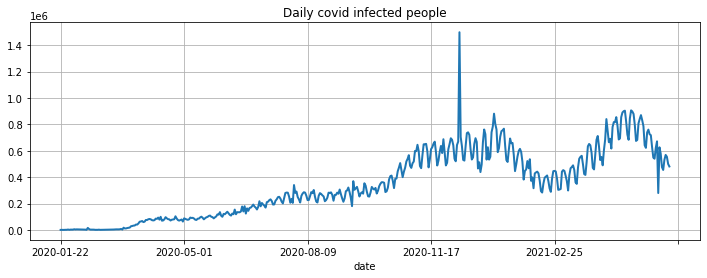

In [5]:
# отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. 
# Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
# Теперь мы наконец можем построить график с помощью метода plot(). 
# Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). 
# Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind = 'line',
    figsize = (12, 4),
    title = 'Daily covid infected people',
    grid = True,
    lw = 2,
    x = 'date',
    y = 'daily_confirmed'
);

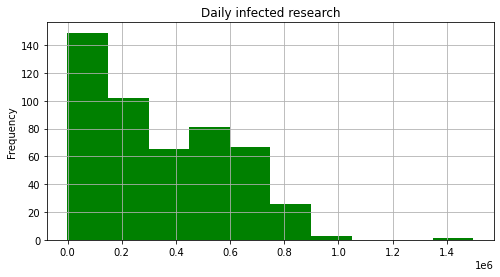

In [9]:
# Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. 
# Для этого параметр kind выставляем на значение 'hist'. 
# Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10
grouped_cases.plot(
    kind = 'hist',
    figsize = (8, 4),
    title = 'Daily infected research',
    grid = True,
    color = 'green',
    bins = 10
);

In [ ]:
# построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.
# метод last()
# возвращает последнее значение в столбце DataFrame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.last.html
# final GroupBy.last(numeric_only=False, min_count=- 1)

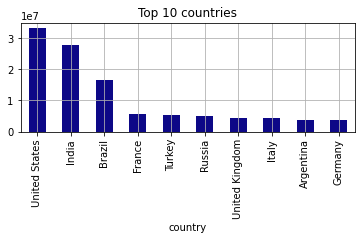

In [8]:
# построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.
countries_top_10 = covid_df.groupby('country')['confirmed'].last() #1 using last()
countries_top_10 = countries_top_10.nlargest(10)  # using nlagest()
countries_top_10.plot(
    kind = 'bar',
    figsize = (6,2),
    grid = True,
    colormap =  'plasma',
    title = 'Top 10 countries'
);

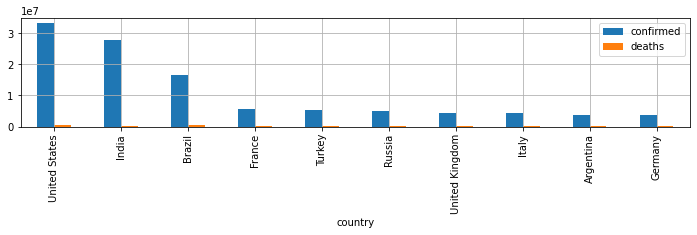

In [19]:
# посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. 
# Для этого отобразим сразу два показателя на столбчатой диаграмме:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed']) # use columns
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 2) 
);
